In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/test.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/submit.csv


In [33]:
data = pd.read_csv("../input/fake-news/train.csv")

In [34]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [35]:
data = data.dropna()

In [36]:
X = data[["title","author","text"]]

In [37]:
X.shape

(18285, 3)

In [38]:
X.isnull().sum()

title     0
author    0
text      0
dtype: int64

In [39]:
messages=data.copy()
messages.reset_index(inplace=True)
messages.head(5)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


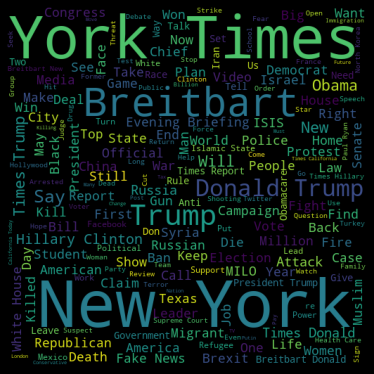

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
real=' '.join(list(messages[messages['label']==0]['title']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

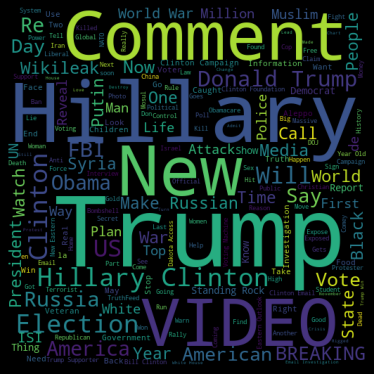

In [42]:
fake=' '.join(list(messages[messages['label']==1]['title']))
fake=WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
from nltk.corpus import stopwords
import re
def corpus_maker(messages):
    corpus = []
    for i in range(0, len(messages)):
        review = re.sub('[^a-zA-Z]', ' ', messages["text"][i])
        review = review.lower()
        review = review.split()

        review = [word for word in review]
        review = ' '.join(review)
        corpus.append(review)
    return corpus


corpus = corpus_maker(messages)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [48]:
y = messages['label']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=1)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
pred = logistic_model.predict(X_test)
accuracy_score(y_test,pred)

0.942398833394094

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3126
           1       0.93      0.93      0.93      2360

    accuracy                           0.94      5486
   macro avg       0.94      0.94      0.94      5486
weighted avg       0.94      0.94      0.94      5486



In [88]:
test_data = pd.read_csv("../input/fake-news/test.csv")

In [89]:
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [90]:
test_data.shape

(5200, 4)

In [91]:
test_data.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [92]:
test_data.fillna('fake fake fake',inplace=True)
# here we are filling NaN value with "fake,fake,fake".we cannot drop the NaN value because
# as the solution file that we have to submitted in kaggle expects 
# it to have 5200 rows so we can't drop rows in the test dataset

In [93]:
test_message = test_data.copy()
test_message.reset_index(inplace=True)
test_message.head(5)

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,1,20801,Russian warships ready to strike terrorists ne...,fake fake fake,Russian warships ready to strike terrorists ne...
2,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [94]:
test_data = tfidf_v.transform(test_message["text"])

In [96]:
test_pred = logistic_model.predict(test_data)

In [97]:
test_pred

array([0, 1, 1, ..., 0, 1, 0])

In [99]:
submission = pd.DataFrame({'id':test_message["id"], 'label':test_pred})
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [101]:
#saving the submission file

submission.to_csv('submission.csv',index=False)

NameError: name 'submit' is not defined